19 MAR 2016<br/>
source: [How to work with large JSON datasets using Python and Pandas](https://www.dataquest.io/blog/using-json-data-in-pandas/)

## The dataset

[Traffic violations in Montgomery County, Maryland](https://catalog.data.gov/dataset/traffic-violations-56dda)

In [7]:
%%bash

du -h in/md_traffic.json

533M	in/md_traffic.json


Even though the JSON file is only 533MB, **we’ll treat it like it’s much larger** so we can explore how analyzing a JSON file that doesn’t fit into memory might work.

## Exploring the data

In [1]:
%%bash

head in/md_traffic.json

{
  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",


In [4]:
%%bash

tail -n 3 in/md_traffic.json

, [ 1175513, "3E94C487-3DE8-49B9-85D1-EFD69DFE11D7", 1175513, 1410968488, "498050", 1427794364, "498050", null, "2012-01-01T00:00:00", "06:20:00", "MCP", "4th district, Wheaton", "FAILURE TO ATTACH VEHICLE REGISTRATION PLATES AT FRONT AND REAR", "W DIAMOND AVE @ N/B 270 OFF RAMP", "39.1409801833333", "-77.2110579666667", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "MD", "02 - Automobile", "2001", "TOYOTA", "CAMRY", "BEIGE", "Citation", "13-411(a)", "Transportation Article", "No", "BLACK", "M", "CHICAGO", "IL", "IL", "A - Marked Patrol", [ "{\"address\":\"\",\"city\":\"\",\"state\":\"\",\"zip\":\"\"}", "39.1409801833333", "-77.2110579666667", null, false ] ]
 ]
}

From this, we can tell `meta` is a top level key, and is indented two spaces. We can get all of the top level keys by using the grep command to print any lines that have two leading spaces:

In [5]:
%%bash

grep -E '^ {2}"' in/md_traffic.json

  "meta" : {
  "data" : [ [ 1905045, "4D225F7E-D754-4D17-B444-0DEE6E15E5A5", 1905045, 1458292363, "498050", 1458292363, "498050", null, "2016-03-17T00:00:00", "02:44:00", "MCP", "6th district, Gaithersburg / Montgomery Village", "STOP LIGHTS (*)", "CLOPPER RD @ FIRST FIELD RD", "-77.23415", "39.1478233333333", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "MD", "02 - Automobile", "2007", "HOND", "4S", "SILVER", "ESERO", "64*", null, "No", "WHITE", "F", "GAITHERSBURG", "MD", "MD", "A - Marked Patrol", [ "{\"address\":\"\",\"city\":\"\",\"state\":\"\",\"zip\":\"\"}", "-77.23415", "39.1478233333333", null, false ] ]


This shows us that `meta` and `data` are top level keys in the md_traffic.json data. A *list of lists* appears to be associated with data, and this likely contains each record in our traffic violations dataset. Each inner list is a record, and the first record appears in the output from the `grep` command.

`meta` usually refers to information about the data itself. Let’s dig a little more into `meta` and see what information is contained there. From the `head` command, we know that there are at least `3` levels of keys, with `meta` containing a key `view`, which contains the keys `id`, `name`, `averageRating` and others. We can print out the full key structure of the JSON file by using grep to print out any lines with `2-6` leading spaces:

In [6]:
%%bash

grep -E '^ {2,6}"' in/md_traffic.json

  "meta" : {
    "view" : {
      "id" : "4mse-ku6q",
      "name" : "Traffic Violations",
      "averageRating" : 0,
      "category" : "Public Safety",
      "createdAt" : 1403103517,
      "description" : "This dataset contains traffic violation information from all electronic traffic violations issued in the County.  Any information that can be used to uniquely identify the vehicle, the vehicle owner or the officer issuing the violation will not be published.\r\n\r\nUpdate Frequency:  Daily",
      "displayType" : "table",
      "downloadCount" : 3423,
      "iconUrl" : "fileId:r41tDc239M1FL75LFwXFKzFCWqr8mzMeMTYXiA24USM",
      "indexUpdatedAt" : 1458293361,
      "newBackend" : false,
      "numberOfComments" : 0,
      "oid" : 8890705,
      "publicationAppendEnabled" : false,
      "publicationDate" : 1411040702,
      "publicationGroup" : 1620779,
      "publicationStage" : "published",
      "rowClass" : "",
      "rowsUpdatedAt" : 1458292370,
      "rowsUpdatedBy" : "ajn4-zy

This shows us the full key structure associated with `md_traffic.json`, and tell us which parts of the JSON file are relevant for us. In this case, the `columns` key looks interesting, as it potentially contains information on the columns in the *list of lists* in the `data` key.

## Extracting information on the columns

[ijson](https://pypi.python.org/pypi/ijson/) is an iterative JSON parser with a standard Python iterator interface.

`ijson` will iteratively parse the json file instead of reading it all in at once. This is slower than directly reading the whole file in, but it enables us to work with large files that can’t fit in memory. To use `ijson`, we specify a file we want to extract data from, then we specify a key path to extract:

In [2]:
from __future__ import print_function, division

import ijson

filename = 'in/md_traffic.json'
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [3]:
# Cell above is slow to run

We use the `items` method in `ijson` to extract a list from the file. We specify the path to the list using the `meta.view.columns` notation. Recall that `meta` is a top level key, which contains `view` inside, which contains `columns` inside it. We then specify `meta.view.columns.item` to indicate that we should extract *each individual item* in the `meta.view.columns` list. 

In [4]:
columns[0]

{u'dataTypeName': u'meta_data',
 u'fieldName': u':sid',
 u'format': {},
 u'id': -1,
 u'name': u'sid',
 u'position': 0,
 u'renderTypeName': u'meta_data'}

From the above output, it looks like each item in `columns` is a dictionary that contains information about each column. In order to get our header, it looks like `fieldName` is the relevant key to extract. To get our column names, we just have to extract the `fieldName` key from each item in `columns`:

In [5]:
column_names = [col['fieldName'] for col in columns]

column_names

[u':sid',
 u':id',
 u':position',
 u':created_at',
 u':created_meta',
 u':updated_at',
 u':updated_meta',
 u':meta',
 u'date_of_stop',
 u'time_of_stop',
 u'agency',
 u'subagency',
 u'description',
 u'location',
 u'latitude',
 u'longitude',
 u'accident',
 u'belts',
 u'personal_injury',
 u'property_damage',
 u'fatal',
 u'commercial_license',
 u'hazmat',
 u'commercial_vehicle',
 u'alcohol',
 u'work_zone',
 u'state',
 u'vehicle_type',
 u'year',
 u'make',
 u'model',
 u'color',
 u'violation_type',
 u'charge',
 u'article',
 u'contributed_to_accident',
 u'race',
 u'gender',
 u'driver_city',
 u'driver_state',
 u'dl_state',
 u'arrest_type',
 u'geolocation']

## Extracting the data

You may recall that the data is locked away in a *list of lists* inside the `data` key. We’ll need to read this data into memory to manipulate it. Fortunately, we can use the column names we just extracted to only grab the columns that are relevant. This will save a ton of space. If the dataset was larger, you could iteratively process batches of rows. So read in the first `10,000,000` rows, do some processing, then the next `10,000,000`, and so on. In this case, we can define the columns we care about, and again use ijson to iteratively process the JSON file:

In [6]:
good_columns = [
    "date_of_stop", 
    "time_of_stop", 
    "agency", 
    "subagency",
    "description",
    "location", 
    "latitude", 
    "longitude", 
    "vehicle_type", 
    "year", 
    "make", 
    "model", 
    "color", 
    "violation_type",
    "race", 
    "gender", 
    "driver_state", 
    "driver_city", 
    "dl_state",
    "arrest_type"
]

In [7]:
good_col_indices = [column_names.index(good_col) for good_col in good_columns]

good_col_indices

[8, 9, 10, 11, 12, 13, 14, 15, 27, 28, 29, 30, 31, 32, 36, 37, 39, 38, 40, 41]

In [8]:
data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        data.append( [row[ix] for ix in good_col_indices] )

In [9]:
data[0]

[u'2016-03-17T00:00:00',
 u'02:44:00',
 u'MCP',
 u'6th district, Gaithersburg / Montgomery Village',
 u'STOP LIGHTS (*)',
 u'CLOPPER RD @ FIRST FIELD RD',
 u'-77.23415',
 u'39.1478233333333',
 u'02 - Automobile',
 u'2007',
 u'HOND',
 u'4S',
 u'SILVER',
 u'ESERO',
 u'WHITE',
 u'F',
 u'MD',
 u'GAITHERSBURG',
 u'MD',
 u'A - Marked Patrol']

## Reading the data into Pandas

In [10]:
import pandas as pd

stops = pd.DataFrame(data, columns=good_columns)

stops.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,vehicle_type,year,make,model,color,violation_type,race,gender,driver_state,driver_city,dl_state,arrest_type
0,2016-03-17T00:00:00,02:44:00,MCP,"6th district, Gaithersburg / Montgomery Village",STOP LIGHTS (*),CLOPPER RD @ FIRST FIELD RD,-77.23415,39.1478233333333,02 - Automobile,2007,HOND,4S,SILVER,ESERO,WHITE,F,MD,GAITHERSBURG,MD,A - Marked Patrol
1,2016-03-17T00:00:00,06:20:00,MCP,"1st district, Rockville",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,N/B 270 @ WEIGH STATION (BEFORE 109),-77.30695,39.25921,08 - Recreational Vehicle,2014,KIA,SOUL,GRAY,Citation,BLACK,M,MD,MONTGOMERY VILLAGE,MD,A - Marked Patrol
2,2016-03-17T00:00:00,08:10:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,S/B ROCKVILLE PIKE @ FLANDERS AVE,-77.1080183333333,39.0389633333333,02 - Automobile,2005,HOND,4S,GREEN,Citation,ASIAN,F,MD,ROCKVILLE,MD,A - Marked Patrol
3,2016-03-17T00:00:00,09:11:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,S/B ROCKVILLE PIKE @ FLANDERS AVE,-77.1084216666667,39.03914,02 - Automobile,2015,TOYOTA,SEDAN,SILVER,Citation,BLACK,M,MD,MONTGOMERY VILLAGE,MD,A - Marked Patrol
4,2016-03-17T00:00:00,02:49:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE IN EXCESS OF REASONABLE AND PR...,E. RANDOLPH RD / OLD COLUMBIA PIKE,-76.9663216666667,39.0634883333333,02 - Automobile,1993,ACUR,2S,GREEN,Citation,BLACK,M,MD,BELTSVILLE,MD,A - Marked Patrol


In [12]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843966 entries, 0 to 843965
Data columns (total 20 columns):
date_of_stop      843966 non-null object
time_of_stop      843966 non-null object
agency            843966 non-null object
subagency         843966 non-null object
description       843958 non-null object
location          843964 non-null object
latitude          769721 non-null object
longitude         769721 non-null object
vehicle_type      843966 non-null object
year              838679 non-null object
make              843965 non-null object
model             843934 non-null object
color             842220 non-null object
violation_type    843966 non-null object
race              843966 non-null object
gender            843966 non-null object
driver_state      843955 non-null object
driver_city       843902 non-null object
dl_state          843037 non-null object
arrest_type       843966 non-null object
dtypes: object(20)
memory usage: 128.8+ MB


How many stops are made by car color:

In [11]:
stops['color'].value_counts()

BLACK          164394
SILVER         153525
WHITE          125125
GRAY            88163
RED             67270
BLUE            62919
GREEN           36281
GOLD            28293
TAN             19162
BLUE, DARK      17758
MAROON          15365
BLUE, LIGHT     11811
BEIGE           10660
GREEN, DK       10485
N/A              9791
GREEN, LGT       5288
BROWN            4100
YELLOW           3263
ORANGE           3014
BRONZE           2021
PURPLE           1752
MULTICOLOR        726
CREAM             609
COPPER            269
PINK              138
CHROME             21
CAMOUFLAGE         17
Name: color, dtype: int64

What kind of police unit created the citation:

In [13]:
stops.arrest_type.value_counts()

A - Marked Patrol                         683147
Q - Marked Laser                           89567
B - Unmarked Patrol                        26011
S - License Plate Recognition              11557
O - Foot Patrol                             9720
L - Motorcycle                              8668
E - Marked Stationary Radar                 4988
R - Unmarked Laser                          4411
G - Marked Moving Radar (Stationary)        2257
M - Marked (Off-Duty)                       1316
I - Marked Moving Radar (Moving)             891
F - Unmarked Stationary Radar                443
C - Marked VASCAR                            324
D - Unmarked VASCAR                          215
P - Mounted Patrol                           176
N - Unmarked (Off-Duty)                      116
H - Unmarked Moving Radar (Stationary)        76
J - Unmarked Moving Radar (Moving)            42
K - Aircraft Assist                           41
Name: arrest_type, dtype: int64

## Converting columns

In [14]:
stops.loc[stops.longitude.isnull(), 'longitude'].head()

31     None
58     None
59     None
150    None
176    None
Name: longitude, dtype: object

In [15]:
import numpy as np

def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x

stops["longitude"] = stops["longitude"].apply(parse_float)
stops["latitude"] = stops["latitude"].apply(parse_float)

Oddly enough, time of day and the date of the stop are stored in two separate columns, `time_of_stop`, and `date_of_stop`. We’ll parse both, and turn them into a single datetime column:

In [19]:
import datetime

def parse_full_date(row):
    date = datetime.datetime.strptime(row['date_of_stop'], '%Y-%m-%dT%H:%M:%S')
    h, m, s = row['time_of_stop'].split(':')
    date = date.replace(hour=int(h), minute=int(m), second=int(s))
    return date

stops['date'] = stops.apply(parse_full_date, axis=1)

#### Which days result in the most traffic stops

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [24]:
stops.date.dt.weekday.head()

0    3
1    3
2    3
3    3
4    3
Name: date, dtype: int64

In [28]:
stops.date.dt.weekday.value_counts().sort_index()

0    115928
1    144772
2    135386
3    129247
4    134085
5     97409
6     87139
Name: date, dtype: int64

Monday is 0 and Sunday is 6

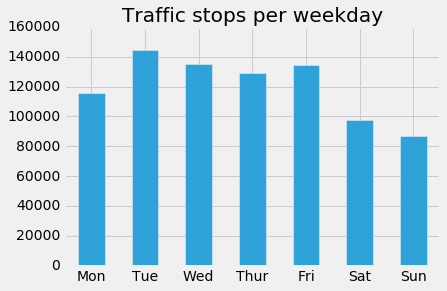

In [40]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ax = stops.date.dt.weekday.value_counts().sort_index().plot(kind='bar', title='Traffic stops per weekday', rot=0)
ax.set_xticklabels(weekdays);

#### Most common traffic stop times

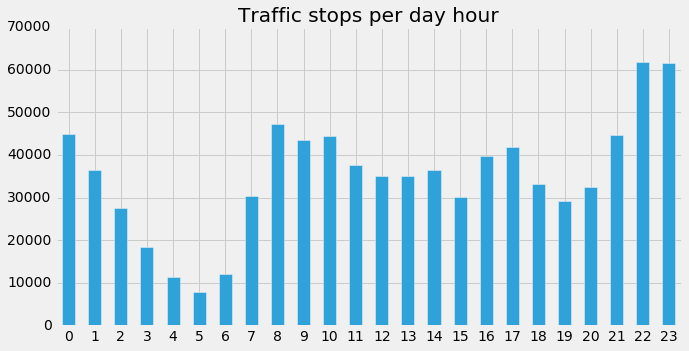

In [39]:
ax = stops.date.dt.hour.value_counts().sort_index().plot(kind='bar', title='Traffic stops per day hour',
                                                         figsize=(10,5), rot=0);

#### Most common traffic stops per weekday and time of the day

In [42]:
stops['weekday'] = stops.date.dt.weekday
stops['weekday'] = stops['weekday'].map( {ix: day for ix, day in enumerate(weekdays)} )

stops['hour'] = stops.date.dt.hour

stops[['date', 'weekday', 'hour']].head()

,date,weekday,hour
0,2016-03-17 02:44:00,Thur,2
1,2016-03-17 06:20:00,Thur,6
2,2016-03-17 08:10:00,Thur,8
3,2016-03-17 09:11:00,Thur,9
4,2016-03-17 02:49:00,Thur,2


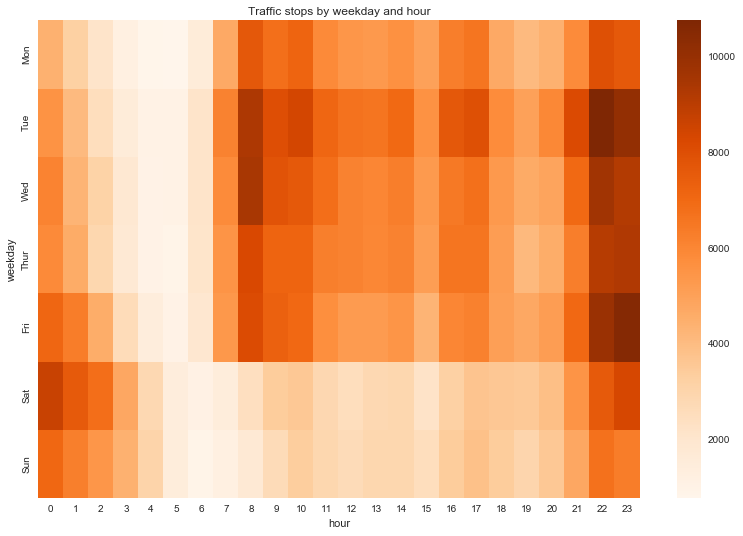

In [60]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(stops.groupby(['weekday', 'hour']).size().unstack().reindex(index=weekdays), cmap='Oranges')
plt.title('Traffic stops by weekday and hour');

During the weekdays, a lot of of stops at 8am - perhaps, people rushing into work. High number of stops between 10 and 11pm on Tue and Fri, which might suggest that Tue might be another popular day for going out in addition to Fri.

## Subsetting the stops

In [61]:
stops.date.min()

Timestamp('2012-01-01 00:43:00')

In [62]:
stops.date.max()

Timestamp('2016-03-17 09:14:00')

In [63]:
stops.shape

(843966, 23)

In [65]:
last_year = stops[stops.date > '2015-03-17']

last_year.shape

(234621, 23)

In [66]:
morning_rush = last_year[(last_year.date.dt.weekday < 5) & (last_year.hour > 6) & (last_year.hour < 11)]

morning_rush.shape

(37363, 23)

In [69]:
# Check I've captured the correct hours
sorted(morning_rush.hour.unique())

[7, 8, 9, 10]

Using [folium](https://github.com/python-visualization/folium) package, we can now visualize where all the stops occurred. In order to preserve performance, we’ll only visualize the first 1000 rows of morning_rush:

In [78]:
print('description:', list(morning_rush.columns).index('description'))
print('lat ix:', list(morning_rush.columns).index('latitude'))
print('long ix:', list(morning_rush.columns).index('longitude'))

description: 4
lat ix: 6
long ix: 7


In [85]:
import folium
from folium import plugins

stops_map = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(stops_map)
for ix, (description, latitude, longitude) in morning_rush.iloc[:1000, [4,6,7]].iterrows():
    folium.Marker([longitude, latitude], popup=description).add_to(marker_cluster)
stops_map.save('out/stops.html')
stops_map

This shows that many traffic stops are concentrated around the bottom right of the county. We can extend our analysis further with a heatmap:

In [88]:
stops_heatmap = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
stops_heatmap.add_children(
    plugins.HeatMap([coords for ix, coords in morning_rush.iloc[:1000, [7, 6]].iterrows()]))
stops_heatmap.save("out/heatmap.html")
stops_heatmap